<a href="https://colab.research.google.com/github/rashmi-biswas/Netflix_movies_tvshows_clustering/blob/main/NETFLIX_MOVIES_%26_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Movies and TV Shows Clustering**

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

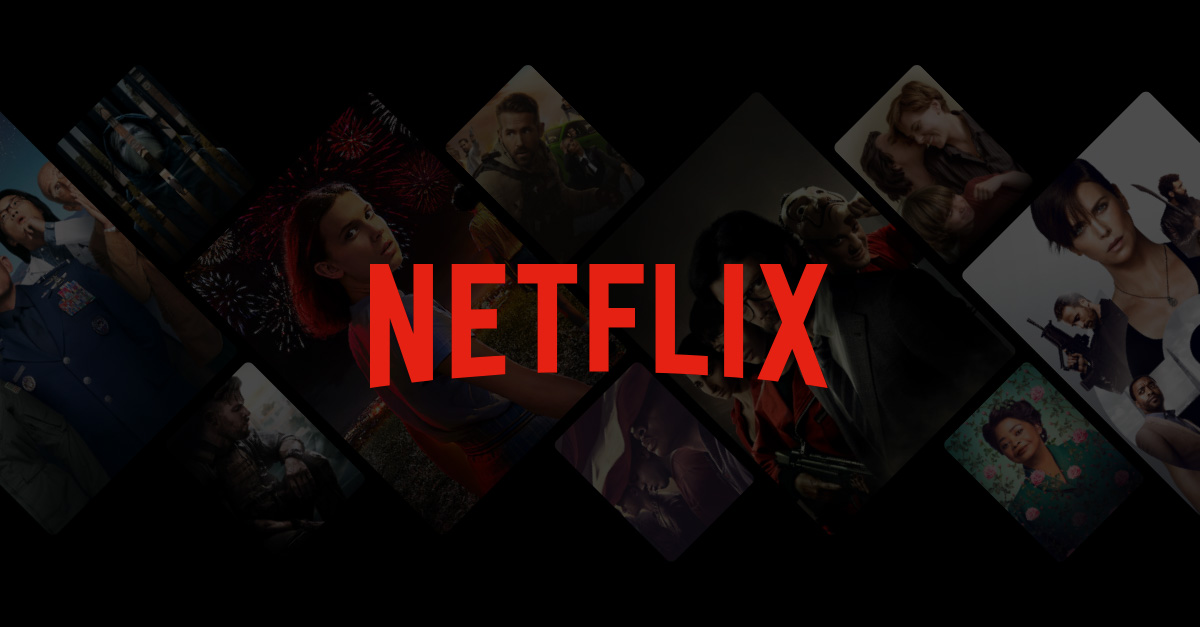

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [20]:
#importing useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
import matplotlib.cm as cm

In [21]:
#mounting google drive to access the files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
#loading dataset
netflix = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/CS Project 4: ML Clustering/Dataset.csv')

### **Understanding Data**

In [23]:
#top 5 rows
netflix.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [24]:
#shape of the dataset
netflix.shape

(7787, 12)

In [25]:
#information about the dataset
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [26]:
#column names
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [27]:
#Drop Duplicates
netflix[netflix.duplicated()]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

**There are no duplicate values**

In [28]:
#checking null values
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [29]:
#all null values
netflix.isnull().sum().sum()

3631

There are total **3631 null values** in the dataset, out of which 2389 are in the director column, 718 are in the cast column and 507 in the country column.
We need to handle the null values of the above 3 columns.
date_added and rating also have **10 and 7 null values** respectively, which comprises of an insignificant portion of the data. 
So we will drop them.

In [30]:
#drop rows having date_added and rating as null
netflix.dropna(subset=['date_added','rating'],inplace=True)

In [31]:
#handling null values
netflix['cast'].fillna(value='No cast', inplace=True)
netflix['country'].fillna(value=netflix['country'].mode()[0],inplace=True)

In [32]:
#droping director column
netflix.drop(['director'],axis=1,inplace=True)

In [33]:
netflix.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [34]:
#convert date time format
netflix["date_added"]=pd.to_datetime(netflix["date_added"])
netflix['year_added']=netflix['date_added'].dt.year
netflix['month_added']=netflix['date_added'].dt.month
netflix['day_added']=netflix['date_added'].dt.day

In [35]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   cast          7770 non-null   object        
 4   country       7770 non-null   object        
 5   date_added    7770 non-null   datetime64[ns]
 6   release_year  7770 non-null   int64         
 7   rating        7770 non-null   object        
 8   duration      7770 non-null   object        
 9   listed_in     7770 non-null   object        
 10  description   7770 non-null   object        
 11  year_added    7770 non-null   int64         
 12  month_added   7770 non-null   int64         
 13  day_added     7770 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 910.5+ KB


In [36]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix['target_ages'] = netflix['rating'].replace(ratings)

In [37]:
# type should be a category
netflix['type'] = pd.Categorical(netflix['type'])

# target_ages is another category (4 classes)
netflix['target_ages'] = pd.Categorical(netflix['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [38]:
netflix.head()

show_id     type  title                                               cast  \
0      s1  TV Show     3%  João Miguel, Bianca Comparato, Michel Gomes, R...   
1      s2    Movie   7:19  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2      s3    Movie  23:59  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3      s4    Movie      9  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4      s5    Movie     21  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   

         country date_added  release_year rating   duration  \
0         Brazil 2020-08-14          2020  TV-MA  4 Seasons   
1         Mexico 2016-12-23          2016  TV-MA     93 min   
2      Singapore 2018-12-20          2011      R     78 min   
3  United States 2017-11-16          2009  PG-13     80 min   
4  United States 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  year_added  month_added  \
0  In a future where the elite inhabit an island ...        2020            8   
1  After a devastating earthquake hits Mexico Cit...        2016           12   
2  When an army recruit is found dead, his fellow...        2018           12   
3  In a postapocalyptic world, rag-doll robots hi...        2017           11   
4  A brilliant group of students become card-coun...        2020            1   

   day_added target_ages  
0         14      Adults  
1         23      Adults  
2         20      Adults  
3         16       Teens  
4          1       Teens